<a href="https://colab.research.google.com/github/luis-gustav0/Repository_A/blob/main/classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cassificação Roupas**

## imports

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Data

## data load

In [2]:
dataset = keras.datasets.fashion_mnist
((X_train, y_train),(X_test, y_test)) = dataset.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## data exploration

In [3]:
len(X_train)

60000

Text(0.5, 1.0, '9')

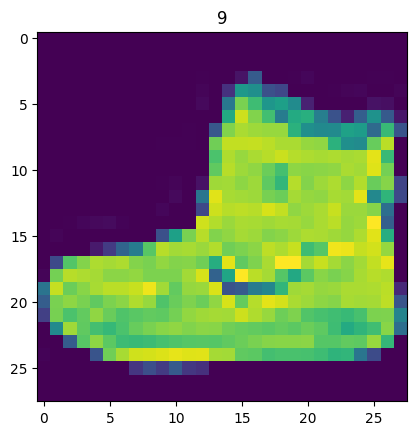

In [4]:
plt.imshow(X_train[0])
plt.title(y_train[0])

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

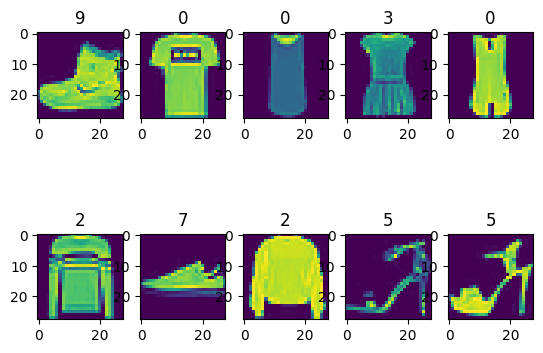

In [6]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])

In [7]:
labels =['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

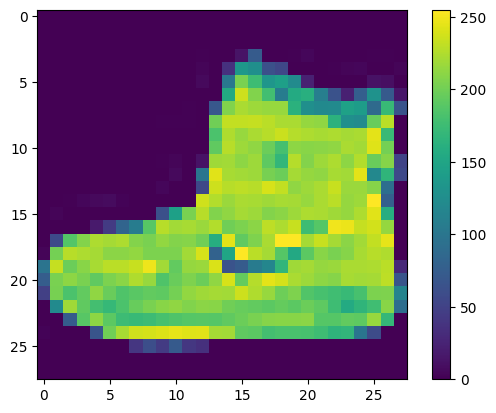

In [8]:
plt.imshow(X_train[0])
plt.colorbar()

## data visualization

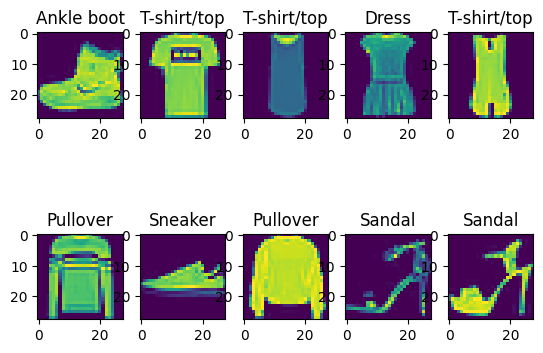

In [9]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(labels[y_train[i]])

# model

normalization

In [10]:
X_train = X_train/float(255)

creating the model

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2), #normalization
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


model compilation

In [48]:
adam = keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model training

In [60]:
early_stop = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=0),
              keras.callbacks.ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)]

hist = model.fit(X_train, y_train, batch_size=480 , callbacks=early_stop ,epochs=10, validation_split=0.2)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9293 - loss: 0.1969 - val_accuracy: 0.8949 - val_loss: 0.2935
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9328 - loss: 0.1855 - val_accuracy: 0.8957 - val_loss: 0.2974


## saving and loading the model

In [14]:
model.save('model.keras')
model_s = load_model('model.keras', custom_objects={'softmax_v2': tensorflow.nn.softmax}) # Diga ao load_model como lidar com 'softmax_v2'

## visualizing *accurency* and *loss* by epoch

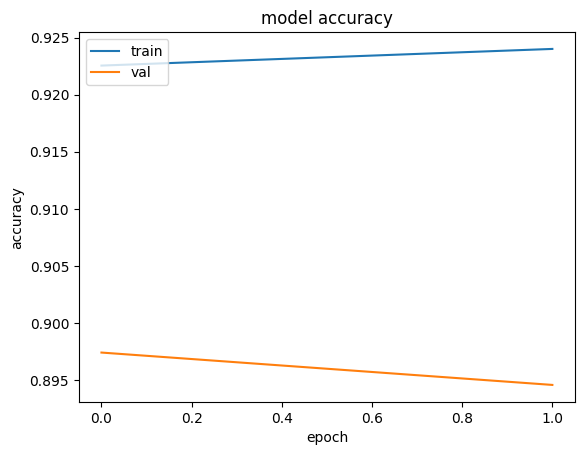

In [56]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

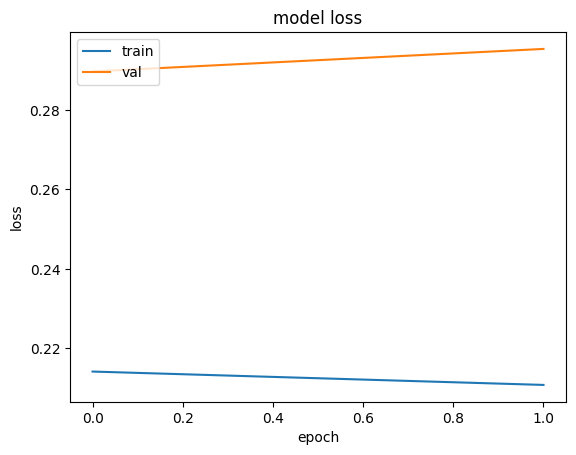

In [57]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')


## testing the model and the saved model

In [17]:
tests = model.predict(X_test)
print('result: ', np.argmax(tests[1]))
print('n img: ', y_test[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
result:  2
n img:  2


In [18]:
tests_model_s = model_s.predict(X_test)
print('S result: ', np.argmax(tests_model_s[1]))
print('S n img: ', y_test[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
S result:  2
S n img:  2


## evaluating the model

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8609 - loss: 47.5832
Test accuracy: 0.8598999977111816
Test loss: 50.50457000732422


# aula 2

## model summary

In [20]:
model_summary = model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

**Weights** of the first *Dense* layer

In [21]:
weight_layer_dense = model.layers[1].get_weights()[0]
weight_layer_dense

array([[-0.03073096,  0.07904796,  0.02498555, ...,  0.02098179,
         0.11585491, -0.06150868],
       [-0.06481197,  0.04917857, -0.0037613 , ...,  0.01066009,
         0.03399433, -0.19776823],
       [-0.14836141,  0.13388659,  0.05665901, ...,  0.04292884,
        -0.14746328, -0.0108617 ],
       ...,
       [-0.07140332,  0.11490643, -0.04677145, ...,  0.06348038,
        -0.0476587 , -0.14249513],
       [-0.05008658,  0.15028019, -0.03544587, ...,  0.11116681,
         0.03232419, -0.2989579 ],
       [ 0.03877504, -0.09024702,  0.06632913, ..., -0.02703742,
         0.13004492, -0.1298662 ]], dtype=float32)

**Bias** of the first *Dense* layer

In [22]:
bias_layer_dense = model.layers[1].get_weights()[1]

### zero wights *dense* layer

In [23]:
weight_layer_dense.shape
weight_layer_dense_zero = np.zeros((784, 256))
model.layers[1].set_weights([weight_layer_dense_zero,bias_layer_dense])
model.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-0.08510718,  0.14556558,  0.02023799,  0.09653164,  0.32440186,
         0.08181123, -0.03896533,  0.2751695 ,  0.04731892,  0.17418356,
         0.2638243 ,  0.41214934,  0.10076703,  0.05619334,  0.15015042,
         0.0422624 ,  0.01409392, -0.01511351,  0.14887865,  0.05452696,
         0.2556156 ,  0.22824413,  0.13924494,  0.28331807,  0.01696496,
         0.13016383,  0.18036704,  0.0211735 ,  0.12369628,  0.02186288,
         0.17004518,  0.22917728, -0.01785445, -0.00850432,  0.34053248,
         0.12664947, -0.01387449,  0.2710195 ,  0.02485299,  0.12761487,
         0.11522549,  0.3558479 ,  0.03778631,  0.15904742, -0.38624755,
         0.10048432,  0.32088277,  0.16318782,  0.23109445,  0.3487032 ,
      

model compile / training

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7568 - loss: 0.6844 - val_accuracy: 0.8529 - val_loss: 0.4043
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8498 - loss: 0.4137 - val_accuracy: 0.8676 - val_loss: 0.3726
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8573 - loss: 0.3849 - val_accuracy: 0.8637 - val_loss: 0.3641
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8691 - loss: 0.3549 - val_accuracy: 0.8717 - val_loss: 0.3470
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8745 - loss: 0.3383 - val_accuracy: 0.8750 - val_loss: 0.3492


accurency

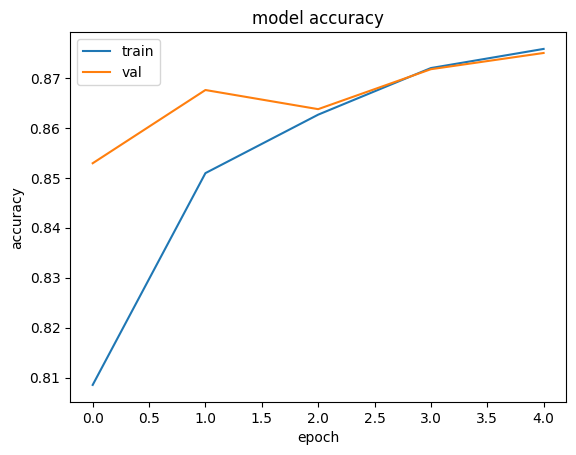

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

loss

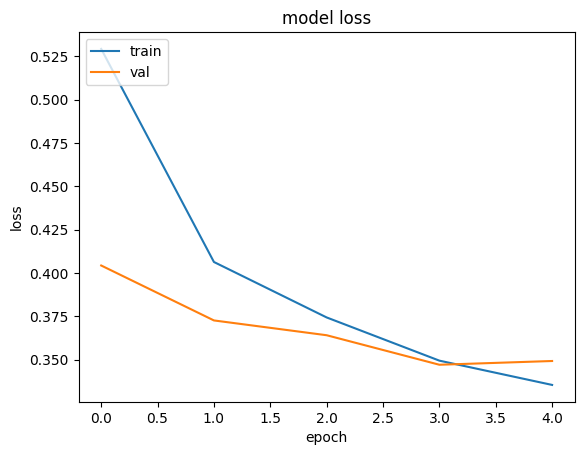

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

## random weights *dense* layer

In [27]:
weight_layer_dense_random = np.random.rand(784, 256)
model.layers[1].set_weights([weight_layer_dense_random,bias_layer_dense])
model.layers[1].get_weights()

[array([[0.25357   , 0.790897  , 0.8932468 , ..., 0.6693219 , 0.4156968 ,
         0.09571155],
        [0.85402954, 0.7259223 , 0.43500444, ..., 0.8996863 , 0.10097557,
         0.22028574],
        [0.92079914, 0.2992174 , 0.96587175, ..., 0.11943725, 0.974147  ,
         0.30610308],
        ...,
        [0.06690957, 0.2905166 , 0.54209524, ..., 0.29196426, 0.11821881,
         0.45333105],
        [0.5272227 , 0.5264207 , 0.2643147 , ..., 0.75418526, 0.47310525,
         0.12118079],
        [0.48719868, 0.7001188 , 0.6227143 , ..., 0.566334  , 0.49269745,
         0.13831508]], dtype=float32),
 array([-0.08510718,  0.14556558,  0.02023799,  0.09653164,  0.32440186,
         0.08181123, -0.03896533,  0.2751695 ,  0.04731892,  0.17418356,
         0.2638243 ,  0.41214934,  0.10076703,  0.05619334,  0.15015042,
         0.0422624 ,  0.01409392, -0.01511351,  0.14887865,  0.05452696,
         0.2556156 ,  0.22824413,  0.13924494,  0.28331807,  0.01696496,
         0.13016383,  0.18036

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2818 - loss: 230.6494 - val_accuracy: 0.7473 - val_loss: 15.2773
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6071 - loss: 37.5302 - val_accuracy: 0.7628 - val_loss: 10.1750
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6856 - loss: 17.0876 - val_accuracy: 0.7446 - val_loss: 6.8808
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7260 - loss: 8.3298 - val_accuracy: 0.7598 - val_loss: 4.4184
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7460 - loss: 4.6218 - val_accuracy: 0.8066 - val_loss: 2.4195


accurancy

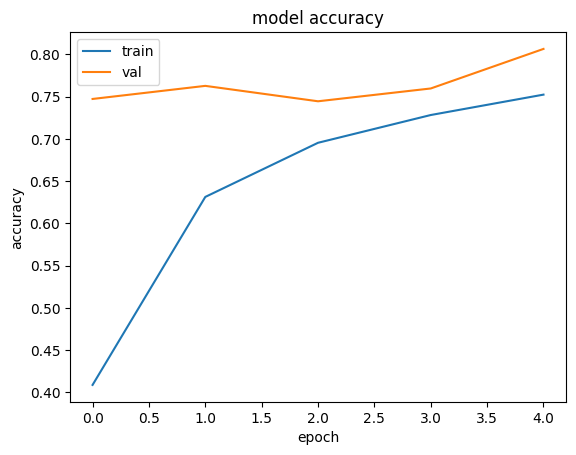

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

loss

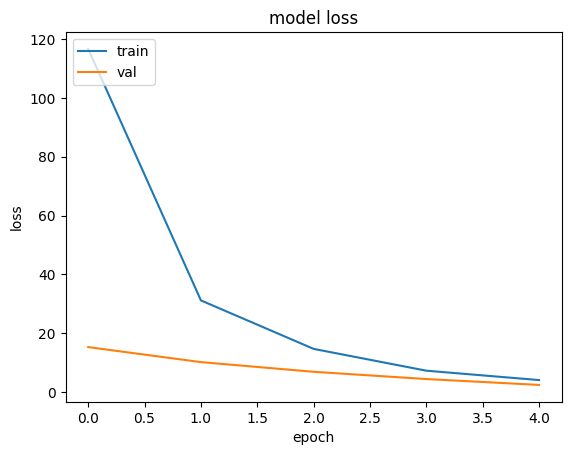

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [31]:
model.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units

## zero **bias/weight** *dense* layer

In [32]:
bias_layer_dense.shape

(256,)

In [33]:
bias_layer_dense_zero = np.zeros((256,))
model.layers[1].set_weights([weight_layer_dense_zero,bias_layer_dense_zero])
model.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0999 - loss: 2.5320 - val_accuracy: 0.0995 - val_loss: 2.3304
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1033 - loss: 2.3151 - val_accuracy: 0.0995 - val_loss: 2.3033
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1004 - loss: 2.3029 - val_accuracy: 0.1027 - val_loss: 2.3027
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1006 - loss: 2.3028 - val_accuracy: 0.0983 - val_loss: 2.3027
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1002 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3028


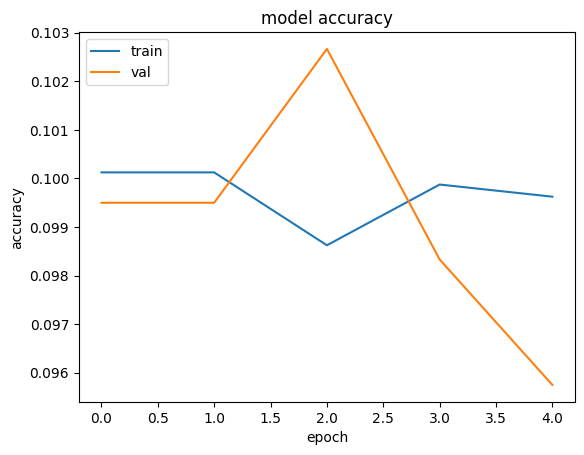

In [35]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

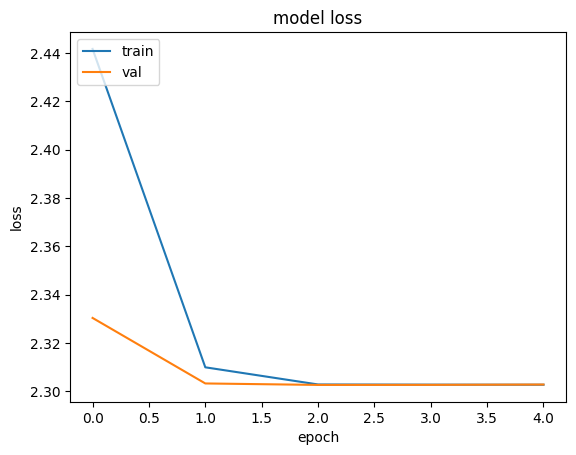

In [36]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

## **random bias - zero weight *dense* layer**

In [ ]:
bias_layer_dense_random = np.random.rand(256,)
model.layers[1].set_weights([weight_layer_dense_zero,bias_layer_dense_random])
model.layers[1].get_weights()

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7559 - loss: 0.6646 - val_accuracy: 0.8483 - val_loss: 0.4205
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8518 - loss: 0.4068 - val_accuracy: 0.8618 - val_loss: 0.3750
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8613 - loss: 0.3704 - val_accuracy: 0.8722 - val_loss: 0.3538
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8742 - loss: 0.3399 - val_accuracy: 0.8785 - val_loss: 0.3369
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8778 - loss: 0.3310 - val_accuracy: 0.8668 - val_loss: 0.3599


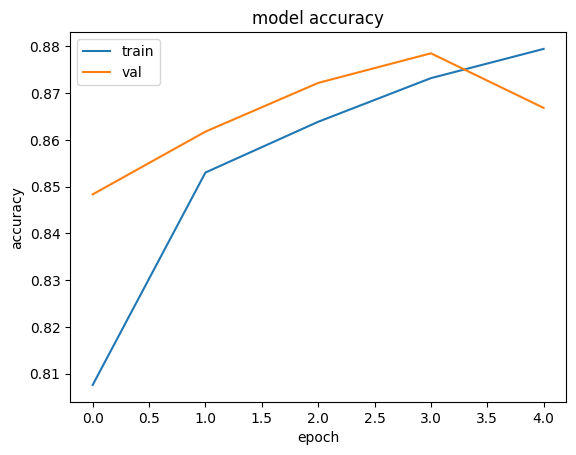

In [39]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

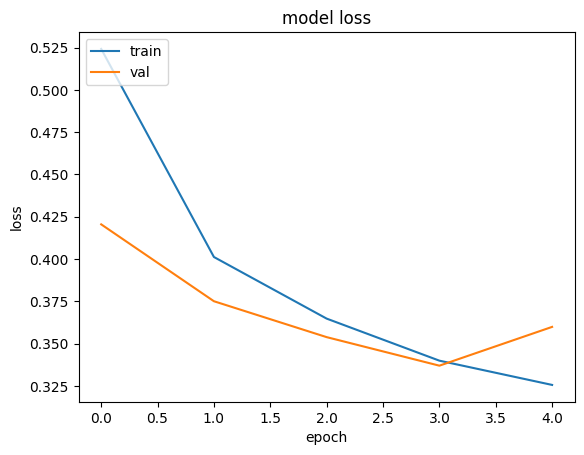

In [40]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')